In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1.  Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# 2. Loading up Dataset

In [ ]:
df=pd.read_csv('/content/cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


Converting the range of the attribute **age** from days to years:

In [ ]:
df['age']=df['age'].apply(lambda x: x/365).astype(int)

Converting the attribute **height** from centimeters to meters, for ease in **bmi** feature creation:

In [ ]:
df['height']=df['height'].apply(lambda x: x/100)

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,51,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,47,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,1,1,1,0,1,0
69996,99995,61,1,1.58,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,1.83,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,1.63,72.0,135,80,1,2,0,0,0,1


In [ ]:
df.nunique()

,0
id,70000
age,28
gender,2
height,109
weight,287
ap_hi,153
ap_lo,157
cholesterol,3
gluc,3
smoke,2


#  3. Data Exploration

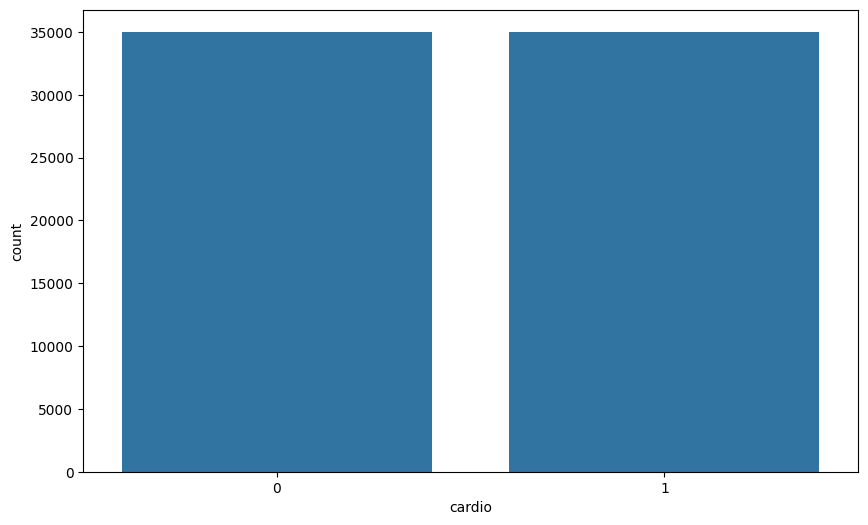

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='cardio')
plt.show()

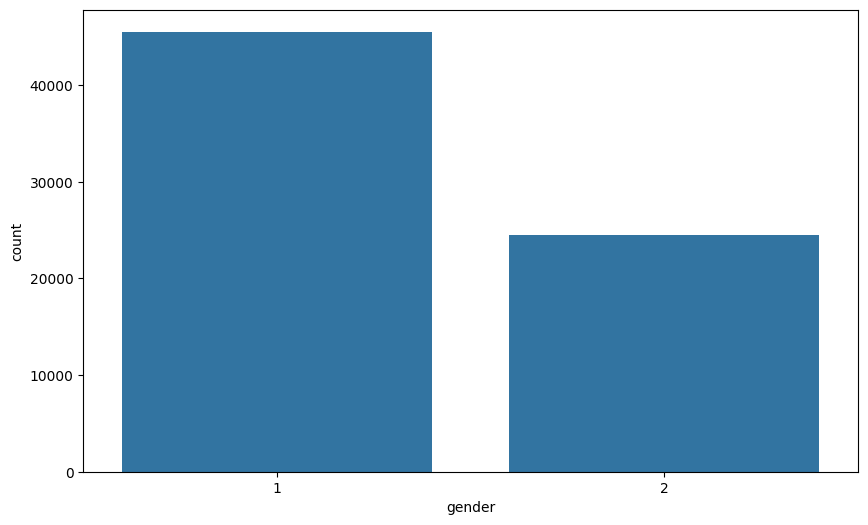

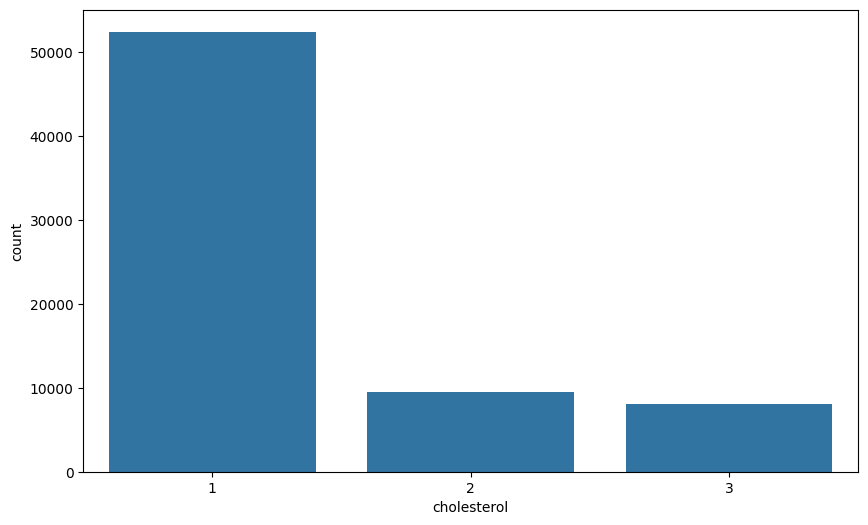

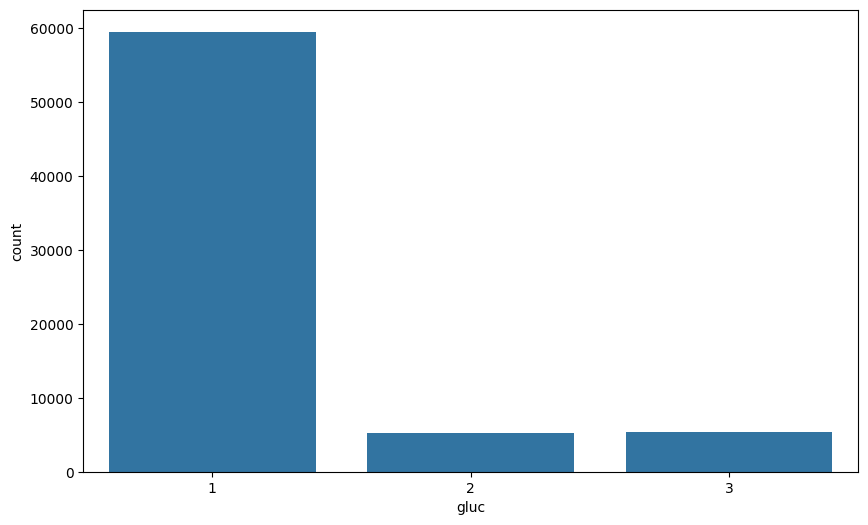

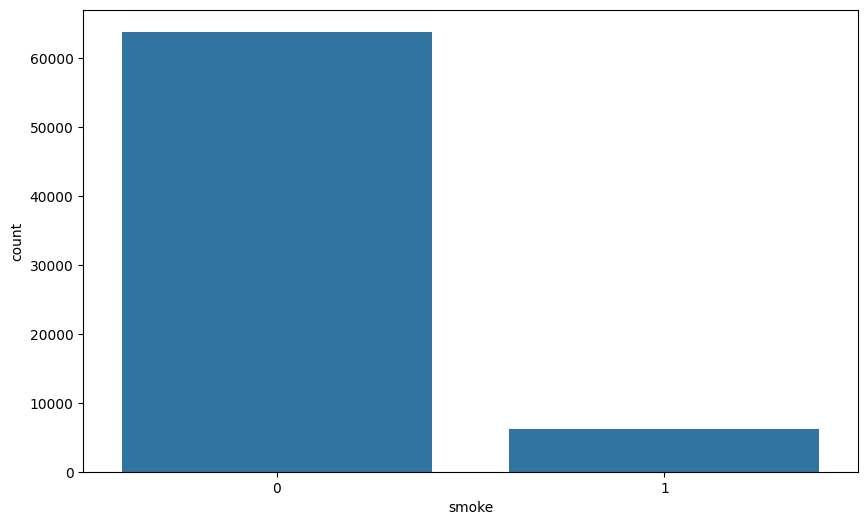

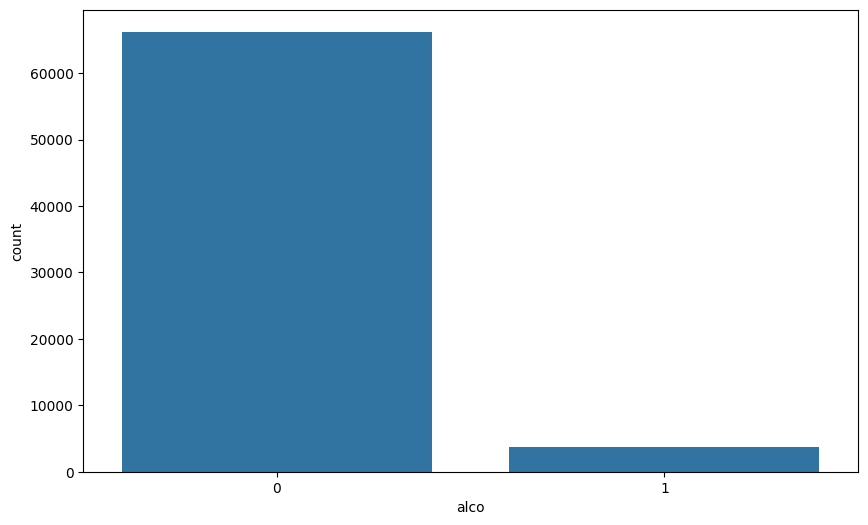

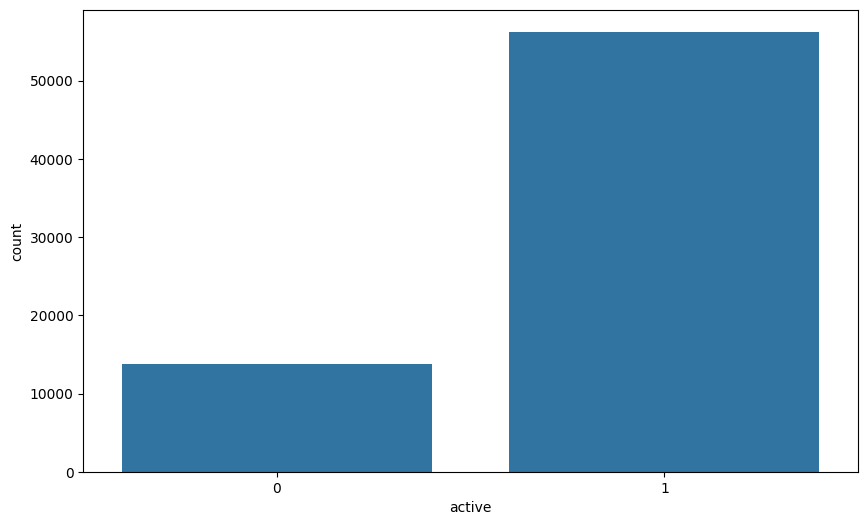

In [ ]:
for i in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=i)
    plt.show()

**The columns 'smoke' and 'alco' are binary attributes, so converting them to categorical doesn't impact the dataset at all**

In [ ]:
# df['smoke']=df['smoke'].apply(lambda x: 'y' if x==1 else 'n')
# df['alco']=df['alco'].apply(lambda x: 'y' if x==1 else 'n')

# 4. Creating New Features

With the existing attributes, we can create the following features:
* pulse_pressure: Calculated by taking difference of the dyastolic and systolic blood pressures.
* map: (Mean Arterial Pressure)
* bmi: (Body Mass Index)
* sys_dsys_ratio: Ratio between the systolic and dyastiloc blood pressure


In [ ]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']

df['map'] = df['ap_lo'] + (df['ap_hi'] - df['ap_lo'])/3

df['bmi']=df['weight']/(df['height'])**2

df['sys_dsys_ratio'] = df['ap_hi'] / df['ap_lo']


# 5. Converting Existing Attributes
Attributes like **cholesterol** and **gluc** have ordinal properties, so lets convert them to categorical:

In [ ]:
df['cholesterol']=df['cholesterol'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))
df['gluc']=df['gluc'].apply(lambda x: 'normal' if x==1 else('above_normal' if x==2 else 'well_above_normal'))

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,map,bmi,sys_dsys_ratio
0,0,50,2,1.68,62.0,110,80,normal,normal,0,0,1,0,30,90.000000,21.967120,1.375000
1,1,55,1,1.56,85.0,140,90,well_above_normal,normal,0,0,1,1,50,106.666667,34.927679,1.555556
2,2,51,1,1.65,64.0,130,70,well_above_normal,normal,0,0,0,1,60,90.000000,23.507805,1.857143
3,3,48,2,1.69,82.0,150,100,normal,normal,0,0,1,1,50,116.666667,28.710479,1.500000
4,4,47,1,1.56,56.0,100,60,normal,normal,0,0,0,0,40,73.333333,23.011177,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,normal,normal,1,0,1,0,40,93.333333,26.927438,1.500000
69996,99995,61,1,1.58,126.0,140,90,above_normal,above_normal,0,0,1,1,50,106.666667,50.472681,1.555556
69997,99996,52,2,1.83,105.0,180,90,well_above_normal,normal,0,1,0,1,90,120.000000,31.353579,2.000000
69998,99998,61,1,1.63,72.0,135,80,normal,above_normal,0,0,0,1,55,98.333333,27.099251,1.687500


In [ ]:
num_cols=df.select_dtypes(exclude='object').columns
cat_cols=df.select_dtypes(include='object').columns

# 6. Feature Analysis (EDA)

<Axes: ylabel='count'>

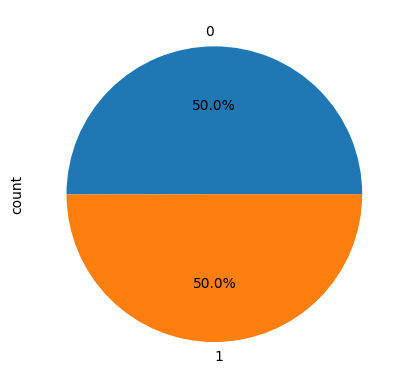

In [ ]:
df['cardio'].value_counts().plot.pie(autopct='%1.1f%%')

# 6. Categorical Analysis

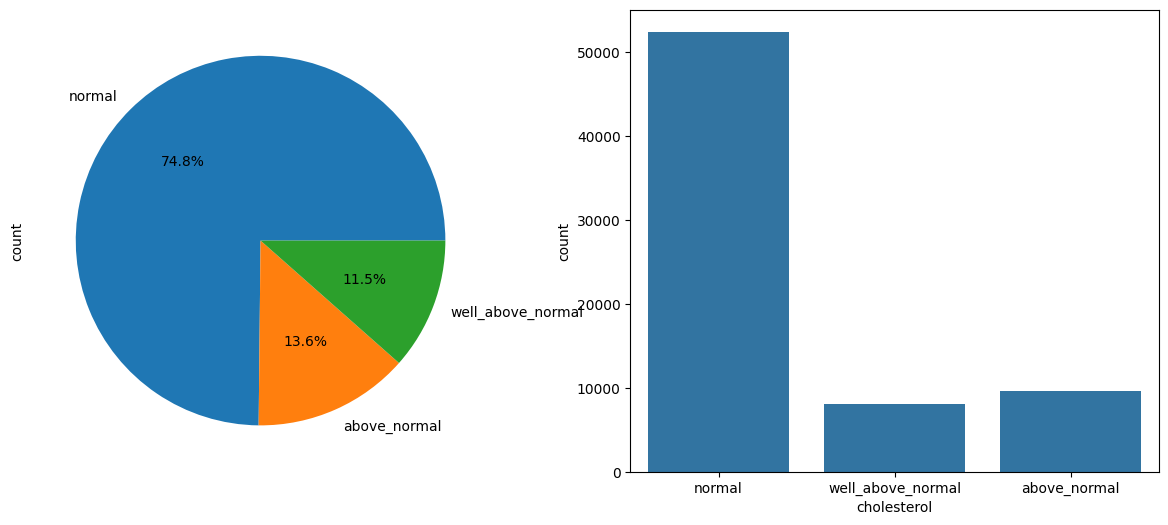

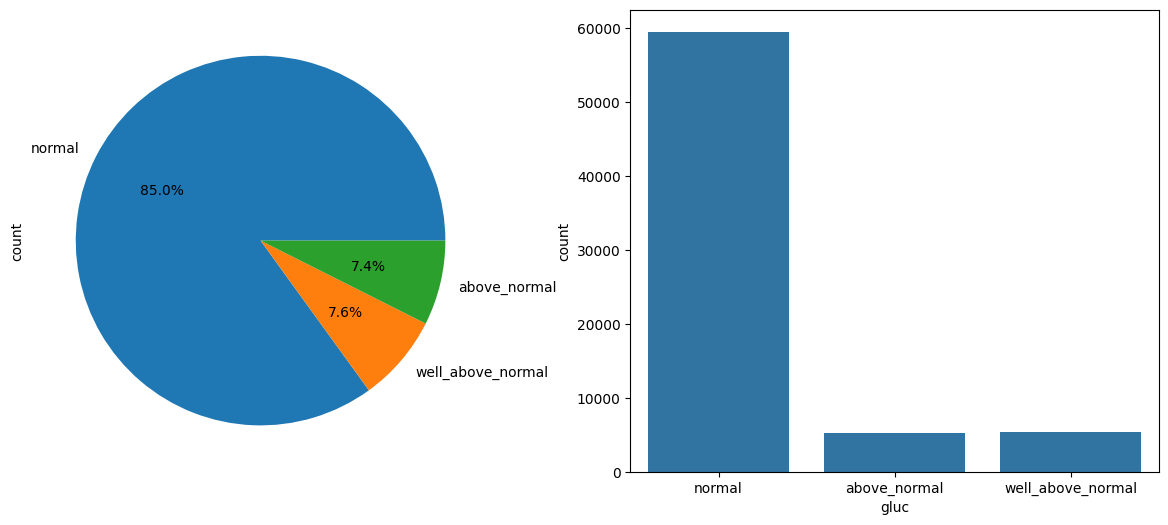

In [ ]:
for i in cat_cols:
    f, ax=plt.subplots(1, 2, figsize=(15,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0])
    sns.countplot(data=df, x=i, ax=ax[1])

# 7. NUMERIC ANALYSIS

In [ ]:
df[num_cols]

,id,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,pulse_pressure,map,bmi,sys_dsys_ratio
0,0,50,2,1.68,62.0,110,80,0,0,1,0,30,90.000000,21.967120,1.375000
1,1,55,1,1.56,85.0,140,90,0,0,1,1,50,106.666667,34.927679,1.555556
2,2,51,1,1.65,64.0,130,70,0,0,0,1,60,90.000000,23.507805,1.857143
3,3,48,2,1.69,82.0,150,100,0,0,1,1,50,116.666667,28.710479,1.500000
4,4,47,1,1.56,56.0,100,60,0,0,0,0,40,73.333333,23.011177,1.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,120,80,1,0,1,0,40,93.333333,26.927438,1.500000
69996,99995,61,1,1.58,126.0,140,90,0,0,1,1,50,106.666667,50.472681,1.555556
69997,99996,52,2,1.83,105.0,180,90,0,1,0,1,90,120.000000,31.353579,2.000000
69998,99998,61,1,1.63,72.0,135,80,0,0,0,1,55,98.333333,27.099251,1.687500


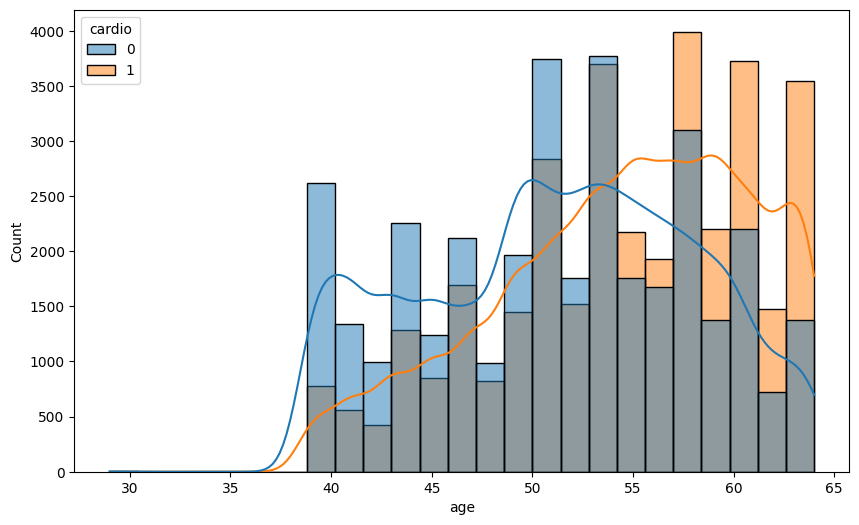

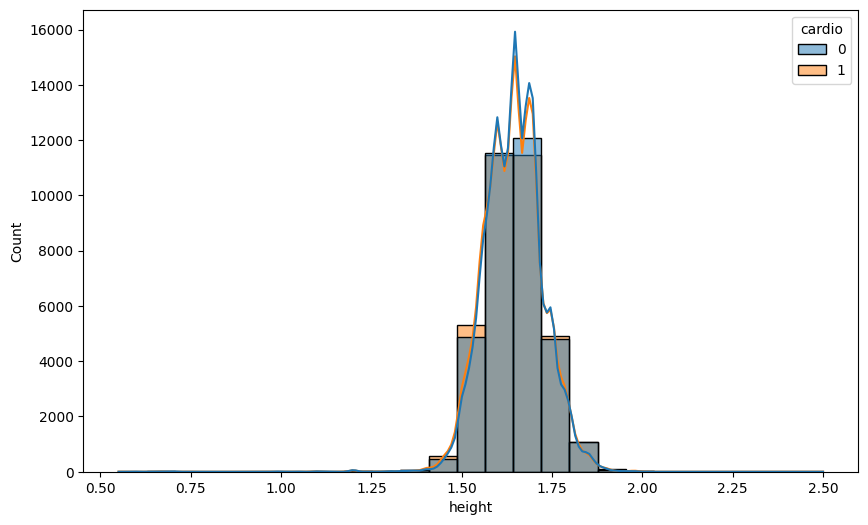

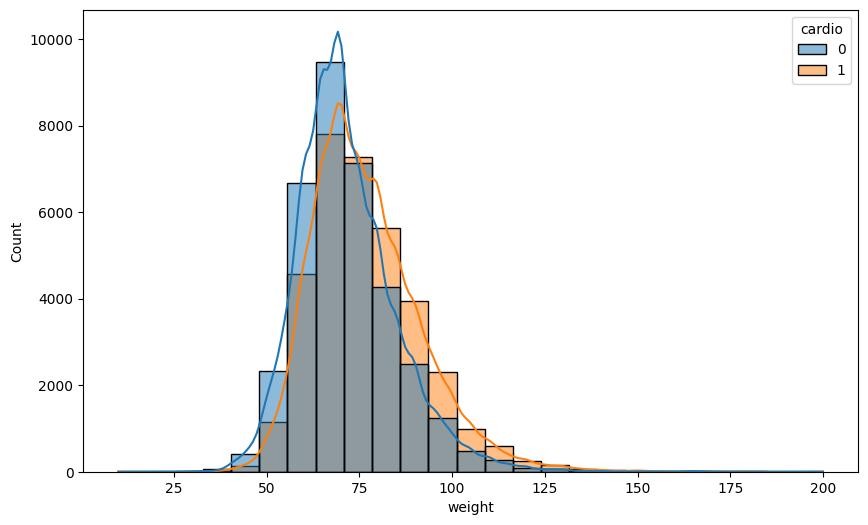

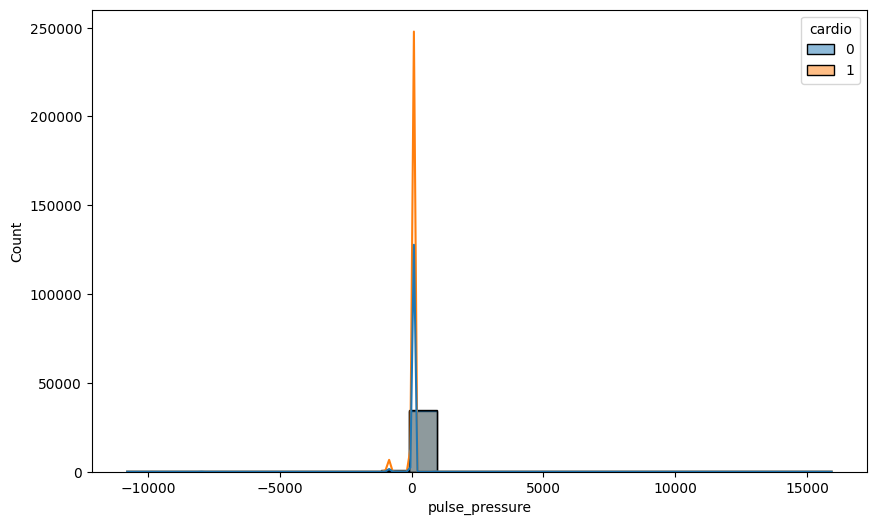

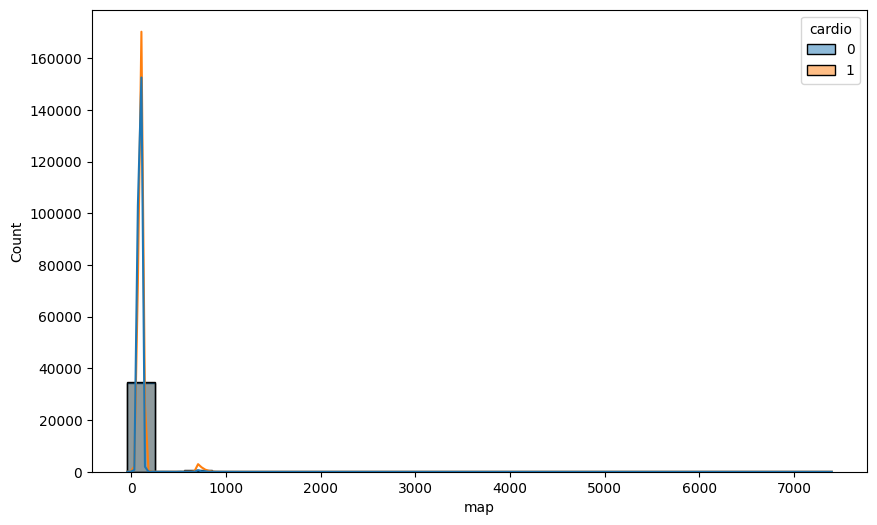

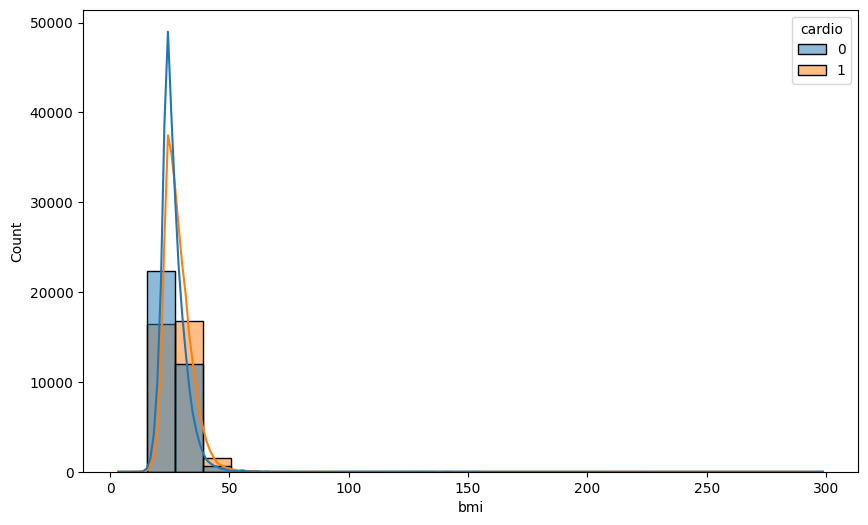

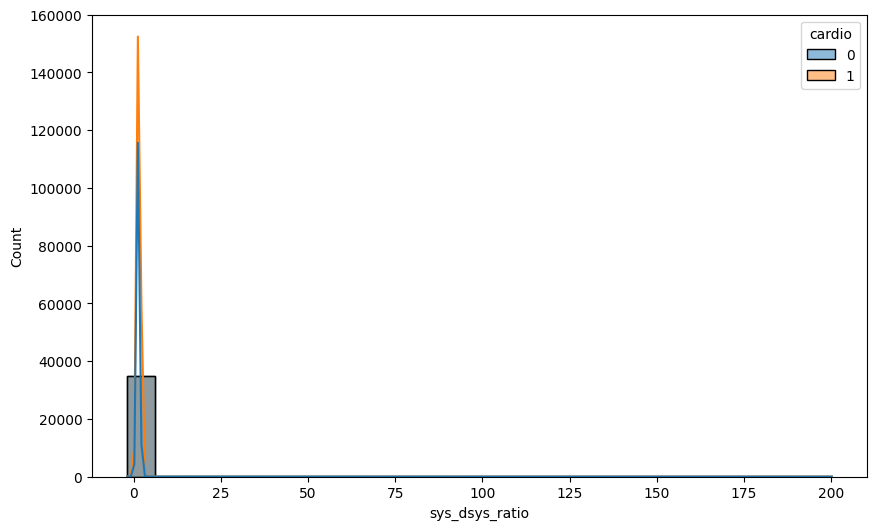

In [ ]:
for i in num_cols.drop(['id', 'gender', 'ap_hi', 'ap_lo', 'smoke','alco','active','cardio']):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=i, hue='cardio', bins=25, kde=True)
    plt.show()

# 8. Attribute Normalzation

In [ ]:
from scipy.stats import boxcox

In [ ]:
age=np.array(df['age'])
_, opt_lambda=boxcox(age)
print(opt_lambda)

2.0359776050549496


In [ ]:
df['age_box']=boxcox(df['age'], lmbda=opt_lambda)

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'pulse_pressure', 'map', 'bmi', 'sys_dsys_ratio', 'age_box'],
      dtype='object')

In [ ]:
# df['bmi_log']=np.log(df['bmi']+1)
# df['map_log']=np.log(df['map']+1)
# df['pp_log']=np.log(df['pulse_pressure']+1)
# df['weight_log']=np.log(df['weight']+1)

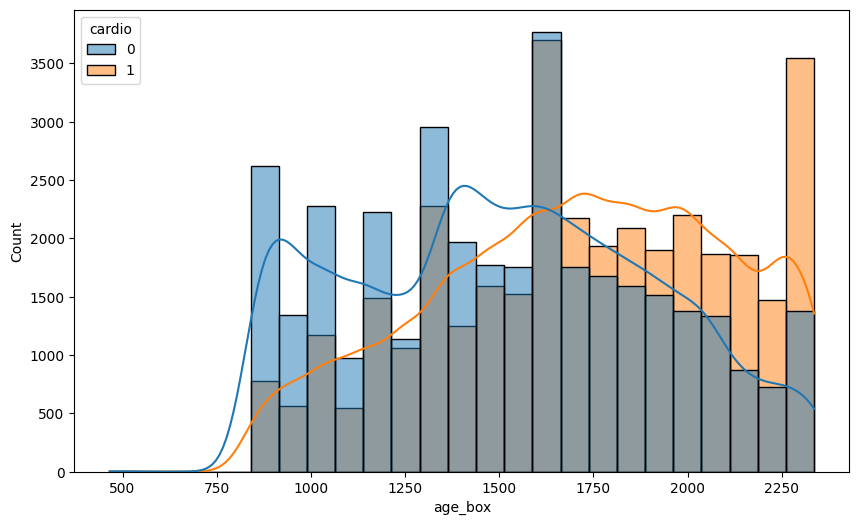

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age_box', hue='cardio', bins=25, kde=True)
plt.show()

we have much better distribution of the age attribute now

# 9. MULTIVARIATE ANALYSIS


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'pulse_pressure', 'map', 'bmi', 'sys_dsys_ratio', 'age_box'],
      dtype='object')

<Figure size 1000x1000 with 0 Axes>

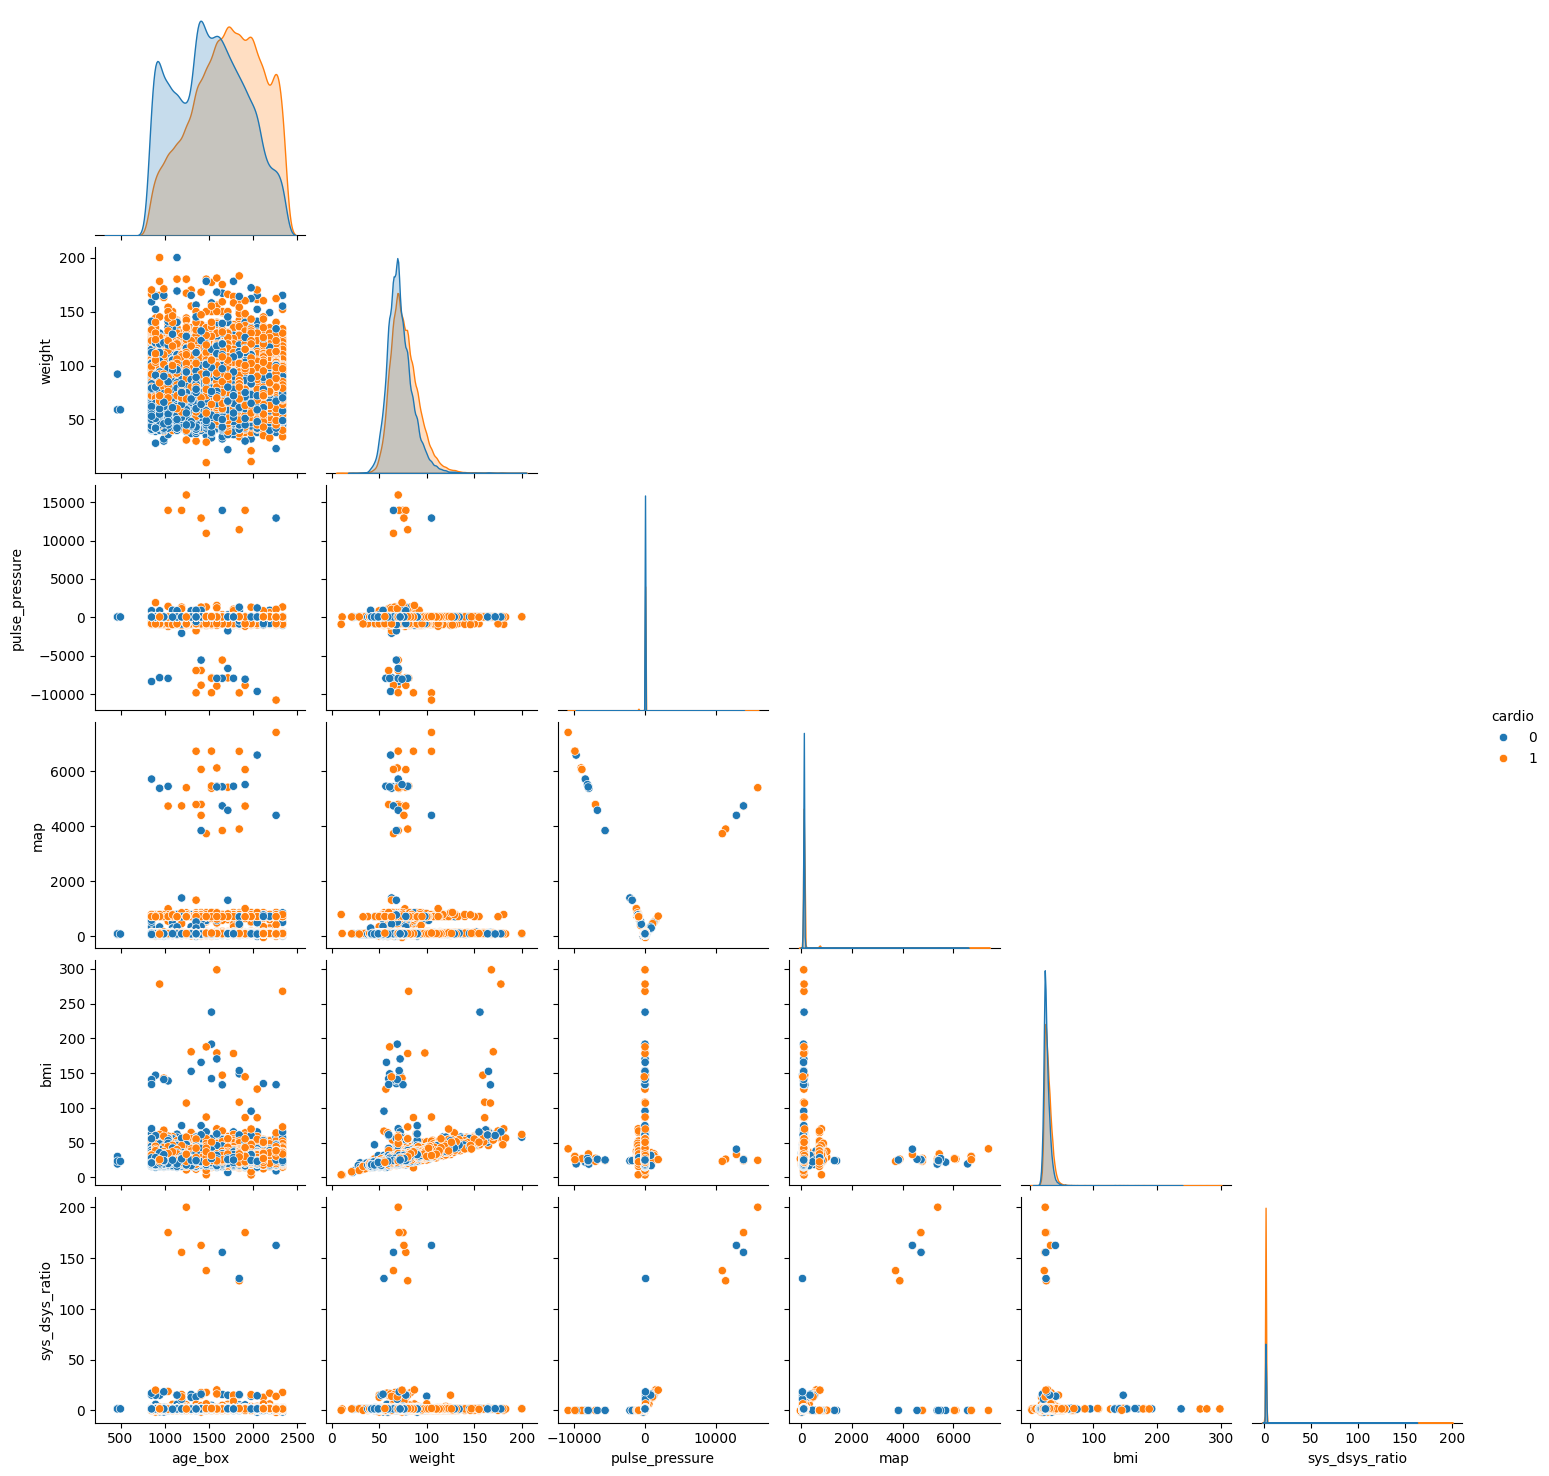

In [ ]:
cols=df[['age_box', 'weight', 'pulse_pressure', 'map','bmi', 'sys_dsys_ratio', 'cardio']]
plt.figure(figsize=(10,10))
sns.pairplot(cols, hue='cardio', corner=True)
plt.show()

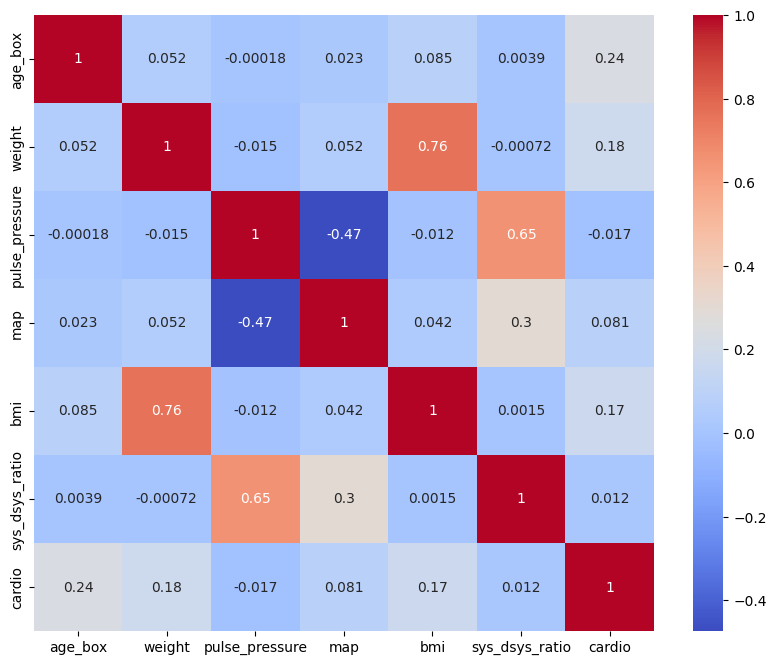

In [ ]:
corr=cols.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# 10. Feature Selection/ Engineering

In [ ]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'pulse_pressure', 'map', 'bmi', 'sys_dsys_ratio', 'age_box'],
      dtype='object')

In [ ]:
features=df[['age_box','weight', 'cholesterol', 'gluc', 'smoke', 'alco','pulse_pressure', 'map', 'bmi']]
target=df['cardio']

In [ ]:
num_features=features.select_dtypes(exclude='object').columns
cat_features=features.select_dtypes(include='object').columns

In [ ]:
num_features

Index(['age_box', 'weight', 'smoke', 'alco', 'pulse_pressure', 'map', 'bmi'], dtype='object')

In [ ]:
cat_features

Index(['cholesterol', 'gluc'], dtype='object')

In [ ]:
features

,age_box,weight,cholesterol,gluc,smoke,alco,pulse_pressure,map,bmi
0,1412.996048,62.0,normal,normal,0,0,30,90.000000,21.967120
1,1715.703170,85.0,well_above_normal,normal,0,0,50,106.666667,34.927679
2,1471.149030,64.0,well_above_normal,normal,0,0,60,90.000000,23.507805
3,1300.266853,82.0,normal,normal,0,0,50,116.666667,28.710479
4,1245.688889,56.0,normal,normal,0,0,40,73.333333,23.011177
...,...,...,...,...,...,...,...,...,...
69995,1530.495406,76.0,normal,normal,1,0,40,93.333333,26.927438
69996,2118.448375,126.0,above_normal,above_normal,0,0,50,106.666667,50.472681
69997,1530.495406,105.0,well_above_normal,normal,0,1,90,120.000000,31.353579
69998,2118.448375,72.0,normal,above_normal,0,0,55,98.333333,27.099251


In [ ]:
target

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


# 11. Scaling Numerical Features

In [ ]:
scaler=StandardScaler()

In [ ]:
features[num_features]=scaler.fit_transform(features[num_features])

In [ ]:
features

,age_box,weight,cholesterol,gluc,smoke,alco,pulse_pressure,map,bmi
0,-0.482921,-0.847873,normal,normal,-0.310879,-0.238384,-0.009057,-0.127182,-0.917577
1,0.264228,0.749831,well_above_normal,normal,-0.310879,-0.238384,0.073770,-0.005075,1.210081
2,-0.339386,-0.708942,well_above_normal,normal,-0.310879,-0.238384,0.115184,-0.127182,-0.664652
3,-0.761162,0.541435,normal,normal,-0.310879,-0.238384,0.073770,0.068189,0.189440
4,-0.895872,-1.264666,normal,normal,-0.310879,-0.238384,0.032357,-0.249288,-0.746181
...,...,...,...,...,...,...,...,...,...
69995,-0.192906,0.124642,normal,normal,3.216684,-0.238384,0.032357,-0.102760,-0.103271
69996,1.258294,3.597913,above_normal,above_normal,-0.310879,-0.238384,0.073770,-0.005075,3.762011
69997,-0.192906,2.139139,well_above_normal,normal,-0.310879,4.194906,0.239424,0.092610,0.623342
69998,1.258294,-0.153219,normal,above_normal,-0.310879,-0.238384,0.094477,-0.066128,-0.075066


# 12. Encoding Categorical Features

In [ ]:
features=pd.get_dummies(features, columns=['cholesterol', 'gluc'])


In [ ]:
features

,age_box,weight,smoke,alco,pulse_pressure,map,bmi,cholesterol_above_normal,cholesterol_normal,cholesterol_well_above_normal,gluc_above_normal,gluc_normal,gluc_well_above_normal
0,-0.482921,-0.847873,-0.310879,-0.238384,-0.009057,-0.127182,-0.917577,False,True,False,False,True,False
1,0.264228,0.749831,-0.310879,-0.238384,0.073770,-0.005075,1.210081,False,False,True,False,True,False
2,-0.339386,-0.708942,-0.310879,-0.238384,0.115184,-0.127182,-0.664652,False,False,True,False,True,False
3,-0.761162,0.541435,-0.310879,-0.238384,0.073770,0.068189,0.189440,False,True,False,False,True,False
4,-0.895872,-1.264666,-0.310879,-0.238384,0.032357,-0.249288,-0.746181,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.192906,0.124642,3.216684,-0.238384,0.032357,-0.102760,-0.103271,False,True,False,False,True,False
69996,1.258294,3.597913,-0.310879,-0.238384,0.073770,-0.005075,3.762011,True,False,False,True,False,False
69997,-0.192906,2.139139,-0.310879,4.194906,0.239424,0.092610,0.623342,False,False,True,False,True,False
69998,1.258294,-0.153219,-0.310879,-0.238384,0.094477,-0.066128,-0.075066,False,True,False,True,False,False


# 13. MODELING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=42,test_size=.30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr=LogisticRegression()
kn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [ ]:
lr.fit(x_train, y_train)
kn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

lr_pred=lr.predict(x_test)
kn_pred=kn.predict(x_test)
dt_pred=dt.predict(x_test)
rf_pred=rf.predict(x_test)

In [ ]:
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_confusion = confusion_matrix(y_test, lr_pred)
lr_classification_report_str = classification_report(y_test, lr_pred)

kn_accuracy=accuracy_score(y_test, kn_pred)
kn_confusion=confusion_matrix(y_test, kn_pred)
kn_classification_report_str=classification_report(y_test, kn_pred)

dt_accuracy=accuracy_score(y_test, dt_pred)
dt_confusion=confusion_matrix(y_test, dt_pred)
dt_classification_report_str=classification_report(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_confusion = confusion_matrix(y_test, rf_pred)
rf_classification_report_str = classification_report(y_test, rf_pred)

In [ ]:
print("Logistic Regression Results:")
print(f"Accuracy: {lr_accuracy}")
print("Confusion Matrix:")
print(lr_confusion)
print("Classification Report:")
print(lr_classification_report_str)

print('KNNClassifier Results: ')
print(f"Accuracy: {kn_accuracy}")
print("Confusion Matrix:")
print(kn_confusion)
print("Classification Report:")
print(kn_classification_report_str)

print('DTClassifier Results: ')
print(f"Accuracy: {dt_accuracy}")
print("Confusion Matrix:")
print(dt_confusion)
print("Classification Report:")
print(dt_classification_report_str)


print('Random Forest Classifier Results: ')
print(f"Accuracy: {dt_accuracy}")
print("Confusion Matrix:")
print(dt_confusion)
print("Classification Report:")
print(dt_classification_report_str)

Logistic Regression Results:
Accuracy: 0.7200952380952381
Confusion Matrix:
[[7984 2477]
 [3401 7138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10461
           1       0.74      0.68      0.71     10539

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000

KNNClassifier Results: 
Accuracy: 0.6588095238095238
Confusion Matrix:
[[7133 3328]
 [3837 6702]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.68      0.67     10461
           1       0.67      0.64      0.65     10539

    accuracy                           0.66     21000
   macro avg       0.66      0.66      0.66     21000
weighted avg       0.66      0.66      0.66     21000

DTClassifier Results: 
Accuracy: 0.6401904761904762
Confusion Matrix:
[[6876 3585]
 [3971 6568]]
Cl

Logistic Regression provides thet best accuracy **72%** out of the box, for predictions. Also it provides the best recall value **76%**

# 14 Cross Validation

In [ ]:
models={
    'Logistic Regression':LogisticRegression(),
    'KNeighbor Classifier':KNeighborsClassifier(),
    'Decision Tree Classifier':DecisionTreeClassifier(),
    'Random Forest Classifier':RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
}

In [ ]:
for i, mod in models.items():
    cv_scores = cross_val_score(mod, x_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {i}:, {cv_scores}")
    print(f"Mean cross-validation score for {i}:, {cv_scores.mean()}")

Cross-validation scores for Logistic Regression:, [0.71102041 0.71897959 0.7172449  0.71408163 0.71183673]
Mean cross-validation score for Logistic Regression:, 0.7146326530612245
Cross-validation scores for KNeighbor Classifier:, [0.65255102 0.65173469 0.65693878 0.65479592 0.65193878]
Mean cross-validation score for KNeighbor Classifier:, 0.6535918367346938
Cross-validation scores for Decision Tree Classifier:, [0.64459184 0.63704082 0.64       0.63734694 0.64081633]
Mean cross-validation score for Decision Tree Classifier:, 0.6399591836734694
Cross-validation scores for Random Forest Classifier:, [0.70765306 0.70214286 0.70704082 0.7027551  0.70673469]
Mean cross-validation score for Random Forest Classifier:, 0.705265306122449


**Logistic Regression**
Accuracy: **72.01%**

Confusion Matrix:
True Negatives: 7985
False Positives: 2476
False Negatives: 3402
True Positives: 7137

Classification Report:
Precision: 0.70 (class 0), 0.74 (class 1)
Recall: 0.76 (class 0), 0.68 (class 1)
F1-Score: 0.73 (class 0), 0.71 (class 1)

Cross-Validation Mean Accuracy: **71.48%**

**K-Nearest Neighbors (KNN) Classifier**
Accuracy: **65.88%**

Confusion Matrix:
True Negatives: 7133
False Positives: 3328
False Negatives: 3837
True Positives: 6702

Classification Report:
Precision: 0.65 (class 0), 0.67 (class 1)
Recall: 0.68 (class 0), 0.64 (class 1)
F1-Score: 0.67 (class 0), 0.65 (class 1)

Cross-Validation Mean Accuracy: **65.36%**

**Decision Tree Classifier**
Accuracy: **63.88%**

Confusion Matrix:
True Negatives: 6863
False Positives: 3598
False Negatives: 3988
True Positives: 6551

Classification Report:
Precision: 0.63 (class 0), 0.65 (class 1)
Recall: 0.66 (class 0), 0.62 (class 1)
F1-Score: 0.64 (class 0), 0.63 (class 1)

Cross-Validation Mean Accuracy: **63.91%**

**Random Forest Classifier**
Accuracy: **63.88%**

Confusion Matrix:
True Negatives: 6863
False Positives: 3598
False Negatives: 3988
True Positives: 6551

Classification Report:
Precision: 0.63 (class 0), 0.65 (class 1)
Recall: 0.66 (class 0), 0.62 (class 1)
F1-Score: 0.64 (class 0), 0.63 (class 1)

Cross-Validation Mean Accuracy: **70.53%**

# 15. Boosting Algorithms

I have already chosen the best parameters for this classifier using **GridSearchCV**

In [ ]:
model=XGBClassifier(objective='binary:logistic',learning_rate=0.1, max_depth=5, n_estimators=50, seed=42)

In [ ]:
#import xgboost
#print(xgboost.__version__)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set parameters
params = {
    "objective": "binary:logistic",
    "eval_metric": "auc"
}

# Train using early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=[(dval, "validation")],
    early_stopping_rounds=5
)



[0]	validation-auc:0.93220
[1]	validation-auc:0.95906
[2]	validation-auc:0.96479
[3]	validation-auc:0.96446
[4]	validation-auc:0.98886
[5]	validation-auc:0.98559
[6]	validation-auc:0.98821
[7]	validation-auc:0.98788
[8]	validation-auc:0.99116
[9]	validation-auc:0.99116
[10]	validation-auc:0.98985
[11]	validation-auc:0.98919
[12]	validation-auc:0.98854


In [ ]:
# Assuming 'features' and 'target' are defined and ready for splitting
from sklearn.model_selection import train_test_split

# Redefine 'features' and 'target' based on your previous code
# Example:
# features = df[['age_box', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'pulse_pressure', 'map', 'bmi']]
# target = df['

In [ ]:
#import xgboost
#print(xgboost.__version__)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score # Import accuracy_score

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
#import xgboost
#print(xgboost.__version__)
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score # Import accuracy_score
from lightgbm import LGBMClassifier # Import the LGBMClassifier class

# Load dataset
X, y = load_breast_cancer(return_X_y=True)
# Use X_train instead of x_train for consistency

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and train the l_model here
l_model = LGBMClassifier(boosting_type='gbdt', # Define l_model within this cell
                         objective='binary',
                         learning_rate=0.1,
                         num_leaves=31,
                         max_depth=-1,
                         n_estimators=100,
                         subsample=1.0,
                         colsample_bytree=1.0,
                         reg_alpha=0.0,
                         reg_lambda=0.0,
                         random_state=42)

l_model.fit(X_train, y_train)

# Now you can make predictions using X_test
predictions_l = l_model.predict(X_test) # Changed x_test to X_test

print('Accuracy Score: ', accuracy_score(y_test, predictions_l)) # Make sure y_test is also defined.

[LightGBM] [Info] Number of positive: 200, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628931 -> initscore=0.527633
[LightGBM] [Info] Start training from score 0.527633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
!pip install gradio joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.ensemble import StackingClassifier # Import StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier



# Assuming 'features' and 'target' are defined and ready for splitting
# features = ...
# target = ...

# Define base models for stacking
base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=50, random_state=42))
]

# Define preprocessing steps
numeric_features = ['age', 'weight', 'pulse_pressure', 'map', 'bmi']
categorical_features = ['cholesterol', 'gluc', 'smoke', 'alco']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories='auto'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline([ # Define and train the pipeline here
    ('preprocessor', preprocessor),
    ('classifier', StackingClassifier(
        estimators=base_models,
        final_estimator=LogisticRegression()
    ))
])

# ... (Assuming you have x_train, y_train from previous steps)
# pipeline.fit(x_train, y_train)  # Train the pipeline

# 1. Save your trained model (if not already done):
joblib.dump(pipeline, "stack_model.pkl")

# ... (Rest of the code)

['stack_model.pkl']

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# Load dataset
X, y = load_breast_cancer(return_X_y=True)

# Split data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define and train the LGBMClassifier model
l_model = LGBMClassifier(boosting_type='gbdt',
                         objective='binary',
                         learning_rate=0.1,
                         num_leaves=31,
                         max_depth=-1,
                         n_estimators=100,
                         subsample=1.0,
                         colsample_bytree=1.0,
                         reg_alpha=0.0,
                         reg_lambda=0.0,
                         random_state=42)

l_model.fit(X_train, y_train)

# Make predictions
predictions_l = l_model.predict(X_test)

# Print accuracy score
print('Accuracy Score:', accuracy_score(y_test, predictions_l))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 200, number of negative: 118
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3198
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628931 -> initscore=0.527633
[LightGBM] [Info] Start training from score 0.527633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

**XGB Classifier:**
Accuracy Score: **73.79%**

**LGBM Classifier:**
Accuracy Score: **73.64%**

# 16. ENSEMBLE LEARNING

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier
from xgboost import XGBClassifier # import XGBClassifier
from lightgbm import LGBMClassifier # import LGBMClassifier

base_models = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('xgb', XGBClassifier(n_estimators=50, random_state=42)),
    ('lgbm', LGBMClassifier(n_estimators=50, random_state=42))
]

In [ ]:
from sklearn.ensemble import StackingClassifier # Import StackingClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

stack_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

In [ ]:
!pip install lightgbm xgboost

In [ ]:


import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the data into a pandas DataFrame
try:
    df = pd.read_csv('/content/cardio_train.csv', delimiter=';')
except FileNotFoundError:
    print("Error: 'cardio_train.csv' not found in the '/content/' directory. Please make sure the file exists.")
    # You can optionally add code to handle the file not found error,
    # like prompting the user to provide the correct path or exiting.
    exit()  # Exit the program if the file is not found

# Feature engineering (similar to your previous code)
df['age'] = df['age'].apply(lambda x: x / 365).astype(int)
df['height'] = df['height'].apply(lambda x: x / 100)
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['map'] = df['ap_lo'] + (df['ap_hi'] - df['ap_lo']) / 3
df['bmi'] = df['weight'] / (df['height'])**2
df['sys_dsys_ratio'] = df['ap_hi'] / df['ap_lo']

# Convert cholesterol and gluc to categorical
df['cholesterol'] = pd.Categorical(df['cholesterol'].map({1: 'normal', 2: 'above_normal', 3: 'well_above_normal'}))
df['gluc'] = pd.Categorical(df['gluc'].map({1: 'normal', 2: 'above_normal', 3: 'well_above_normal'}))

# Define features and target
features = ['age', 'weight', 'cholesterol', 'gluc', 'smoke', 'alco', 'pulse_pressure', 'map', 'bmi']
target = 'cardio'

# Create a ColumnTransformer for preprocessing
numeric_features = ['age', 'weight', 'pulse_pressure', 'map', 'bmi']
categorical_features = ['cholesterol', 'gluc', 'smoke', 'alco']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and stacking classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', StackingClassifier(
        estimators=[
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('xgb', XGBClassifier(n_estimators=50, random_state=42)),
            ('lgbm', LGBMClassifier(n_estimators=50, random_state=42))
        ],
        final_estimator=LogisticRegression()
    ))
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], random_state=42, test_size=0.30)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Stacking Classifier Accuracy: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 24440, number of negative: 24560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 49000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19552, number of negative: 19648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 772
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19552, number of negative: 19648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19552, number of negative: 19648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19552, number of negative: 19648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 774
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19552, number of negative: 19648
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 771
[LightGBM] [Info] Number of data points in the train set: 39200, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498776 -> initscore=-0.004898
[LightGBM] [Info] Start training from score -0.004898


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacking Classifier Accuracy: 73.59%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


The stacking classifier, which combines the predictions of KNN, XGBoost, and LightGBM models, achieved an accuracy of **73.67%.**

# 17. GUI Representation


In [ ]:
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample dataset and model (Replace with actual dataset)
data = pd.DataFrame({
    'BMI': np.random.uniform(18, 40, 100),
    'Age': np.random.randint(30, 65, 100),
    'Gender': np.random.randint(1, 3, 100),
    'Cholesterol': np.random.randint(1, 4, 100),
    'Glucose': np.random.randint(1, 4, 100),
    'Smoke': np.random.randint(0, 2, 100),
    'Alcohol': np.random.randint(0, 2, 100),
    'Activity': np.random.randint(0, 2, 100),
    'Avg_BP': np.random.randint(50, 190, 100),
    'CVD': np.random.randint(0, 2, 100)
})

X = data.drop(columns=['CVD'])
y = data['CVD']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Gradio Function
def predict_cvd(BMI, Age, Gender, Cholesterol, Glucose, Smoke, Alcohol, Activity, Avg_BP):
    user_data = np.array([[BMI, Age, Gender, Cholesterol, Glucose, Smoke, Alcohol, Activity, Avg_BP]])
    user_data_scaled = scaler.transform(user_data)
    prediction = model.predict(user_data_scaled)[0]
    result = "You have CVD" if prediction == 1 else "You don't have CVD"
    return result

# Gradio Interface
iface = gr.Interface(
    fn=predict_cvd,
    inputs=[
        gr.Number(label="BMI"),
        gr.Number(label="Age"),
        gr.Number(label="Gender (1 for Male, 2 for Female)"),
        gr.Number(label="Cholesterol (1-4)"),
        gr.Number(label="Glucose (1-4)"),
        gr.Number(label="Smoke (0 for No, 1 for Yes)"),
        gr.Number(label="Alcohol (0 for No, 1 for Yes)"),
        gr.Number(label="Activity (0 for No, 1 for Yes)"),
        gr.Number(label="Avg_BP")
    ],
    outputs="text",
    title="CVD Prediction App"
)

iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de51742c7b94f2dd8a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 18. Insights


* Logistic Regression performed the best among the traditional classifiers with an accuracy of 72.01% and a cross-validation mean accuracy of **71.48%.**

* XGB Classifier and LGBM Classifier showed the highest accuracy scores of **73.79%** and **73.64%**, respectively.

* The Stacking Classifier, which combines KNN, XGBoost, and LightGBM models, achieved an accuracy of **73.67%**, indicating that ensemble methods can provide a slight performance boost.